In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold

In [2]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/admissions.csv"


In [3]:
dfa = pd.read_csv(path)

In [4]:
dfa

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
...,...,...,...
639,1,3.381359,720.718438
640,1,3.083956,556.918021
641,1,3.114419,734.297679
642,1,3.549012,604.697503


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [6]:
linear_model = LinearRegression()
linear_model.fit(dfa[['gpa']], dfa['admit'])

LinearRegression()

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(dfa[['gpa']], dfa['admit'])

LogisticRegression()

In [8]:
pred_probs = logistic_model.predict_proba(dfa[["gpa"]])

In [9]:
pred_probs

array([[0.66343633, 0.33656367],
       [0.53967962, 0.46032038],
       [0.84160275, 0.15839725],
       ...,
       [0.69368514, 0.30631486],
       [0.46457162, 0.53542838],
       [0.47350995, 0.52649005]])

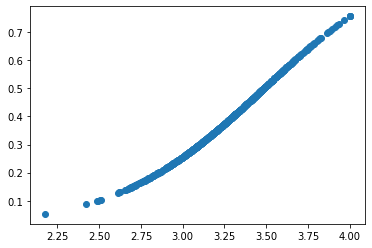

In [10]:
plt.scatter(dfa['gpa'], pred_probs[:, 1])

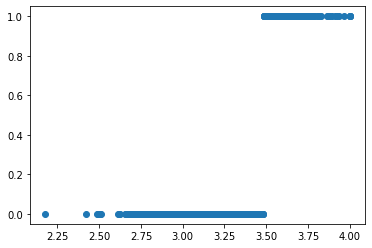

In [11]:
fitted_labels = logistic_model.predict(dfa[['gpa']])
plt.scatter(dfa['gpa'], fitted_labels)

In [12]:
dfa['predicted_label'] = fitted_labels

In [13]:
dfa['predicted_label'].value_counts()

0    507
1    137
Name: predicted_label, dtype: int64

In [14]:
dfa

,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0
...,...,...,...,...
639,1,3.381359,720.718438,0
640,1,3.083956,556.918021,0
641,1,3.114419,734.297679,0
642,1,3.549012,604.697503,1


In [15]:
matches = dfa['predicted_label'] == dfa['admit']
correect_predictions = dfa[matches]

In [16]:
correect_predictions.shape

(441, 4)

In [17]:
dfa.shape

(644, 4)

In [18]:
accuracy = len(correect_predictions)/len(dfa)

In [19]:
accuracy

0.6847826086956522

In [20]:
TP_filter = (dfa["predicted_label"] == 1) & (dfa['admit']==1)
TN_filter = (dfa["predicted_label"] == 0) & (dfa['admit']==0)
FP_filter = (dfa["predicted_label"] == 1) & (dfa['admit']==0)
FN_filter = (dfa["predicted_label"] == 0) & (dfa['admit']==1)


In [21]:
len(dfa[TP_filter])

89

In [22]:
len(dfa[TN_filter])

352

In [23]:
len(dfa[FP_filter])

48

In [24]:
len(dfa[FN_filter])

155

# Sensitivity and Specificity

Sensitivity is the percentage of true positives (e.g. 90% sensitivity = 90% of people who have the target disease will test positive). <br>

Specificity is the percentage of true negatives (e.g. 90% specificity = 90% of people who do not have the target disease will test negative) <br>


https://geekymedics.com/sensitivity-specificity-ppv-and-npv/#:~:text=Sensitivity%20is%20the%20percentage%20of,target%20disease%20will%20test%20negative).

In [26]:
tp = len(dfa[TP_filter])
tn = len(dfa[TN_filter])
fp = len(dfa[FP_filter])
fn = len(dfa[FN_filter])

In [27]:
sensitivity = tp/(tp+fn)

In [28]:
sensitivity

0.36475409836065575

In [29]:
specificity = tn/(fp+tn)

In [30]:
specificity

0.88

In [31]:
len(dfa) - len(dfa[dfa['admit'] == 1])

400

In [33]:
len(dfa)

644